# Analysis of the Chemical Universe growth vs diversity using iSIM based tools
By Kenneth Lopez-Perez

Miranda-Quintana Group

University of Florida

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from universe_class import Universe

Load the data as a .csv file. File should contain a column named 'smiles' and 'release'. The release corresponds to the realease number or correspondent year, must be an int. 

We create an universe object to do our analysis. For this example we will use ChEMBL's natural products file in the data directory.

In [2]:
# Set the similarity index of choice between "JT" Jaccard-Tanimoto, "SM" Sokal-Michener, and "RR" Russell-Rao
similarity_index = "JT"

# Set the fingerprint type of choice between "RDKIT", "ECFP4", "ECFP6", and "MACCS"
fingerprint_type = "RDKIT"

# Set the number of desired bits, necessary in case of ECFP fingerprints
n_bits = 1024

chembl_np = Universe('data/chembl_33_np.csv', n_ary=similarity_index, fingerprint_type=fingerprint_type, n_bits=n_bits)

Generate the fingerprints, they can be safed if wanted

In [3]:
# Generate the fingerprints
chembl_np.calc_universe_fingerprints()

# Saved the fingerprints if wanted as .npy file
# chembl_np.save_universe_fingerprints()

# Load the fingerprints if already saved as .npy file
#chembl_np.set_universe_fingerprints('data/chembl_33_np.npy')

Perform the similarity/diversity analysis of the Chemical Universe

This will generate a csv with the analysis

In [4]:
universe_analysis = chembl_np.universe_analysis()

Analysis of release 1 completed
Analysis of release 2 completed
Analysis of release 3 completed
Analysis of release 4 completed
Analysis of release 5 completed
Analysis of release 6 completed
Analysis of release 7 completed
Analysis of release 8 completed
Analysis of release 9 completed
Analysis of release 10 completed
Analysis of release 11 completed
Analysis of release 12 completed
Analysis of release 13 completed
Analysis of release 14 completed
Analysis of release 15 completed
Analysis of release 16 completed
Analysis of release 17 completed
Analysis of release 18 completed
Analysis of release 19 completed
Analysis of release 20 completed
Analysis of release 21 completed
Analysis of release 22 completed
Analysis of release 23 completed
Analysis of release 24 completed
Analysis of release 25 completed
Analysis of release 26 completed
Analysis of release 27 completed
Analysis of release 28 completed
Analysis of release 29 completed
Analysis of release 30 completed
Analysis of release

Plotting of the calculated ChemUniverse growth vs diversity

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


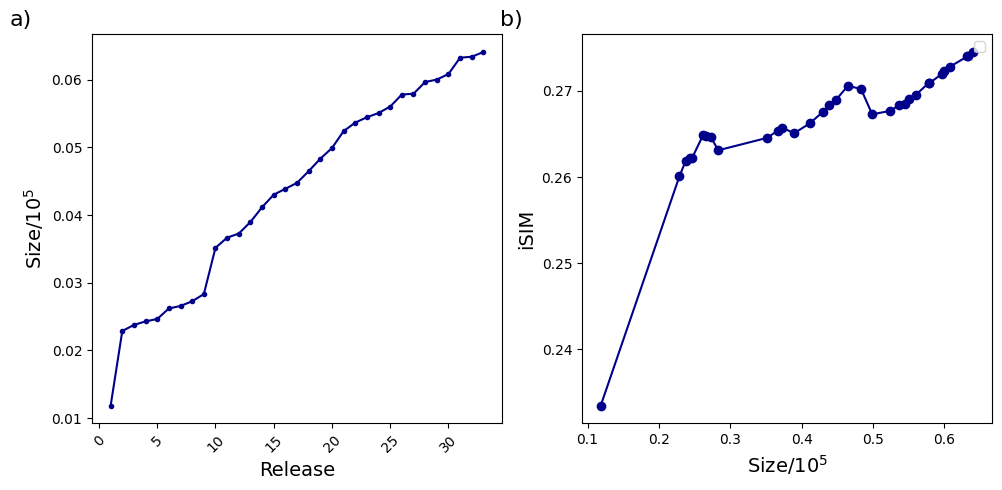

In [6]:
# Create a plot with two panels, one year vs size and the other size vs iSIM
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the year vs size
ax[0].plot(universe_analysis['release'], np.array(universe_analysis['size'])/10**6, color='darkblue', marker='.')

# Plot the size vs iSIM
ax[1].plot(np.array(universe_analysis['size'])/10**5, universe_analysis['iSIM'], color='darkblue', marker='o')

# Add labels and title
ax[0].set_xlabel('Release', fontsize=14)
ax[0].set_ylabel('Size/$10^5$', fontsize=14)

# Set all tick labels on the x-axis to be visible
plt.setp(ax[0].xaxis.get_majorticklabels(), visible=True)

# Set title for the two panels
ax[0].set_title('a)', fontsize=16, loc='left', x=-0.2)
ax[1].set_title('b)', fontsize=16, loc='left', x=-0.2)

# Rotate the x-tick labels for better readability
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=45, fontsize=10)
plt.setp(ax[0].yaxis.get_majorticklabels(), fontsize=10)

ax[1].set_xlabel('Size/$10^5$', fontsize=14)
ax[1].set_ylabel('iSIM', fontsize=14)

# Set font size for the y the x-tick labels
plt.setp(ax[1].xaxis.get_majorticklabels(), fontsize=10)
plt.setp(ax[1].yaxis.get_majorticklabels(), fontsize=10)

plt.tight_layout()
plt.show()

Perform the clustering of the Chemical Universe